In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.dates as mdates
from datetime import datetime, timedelta

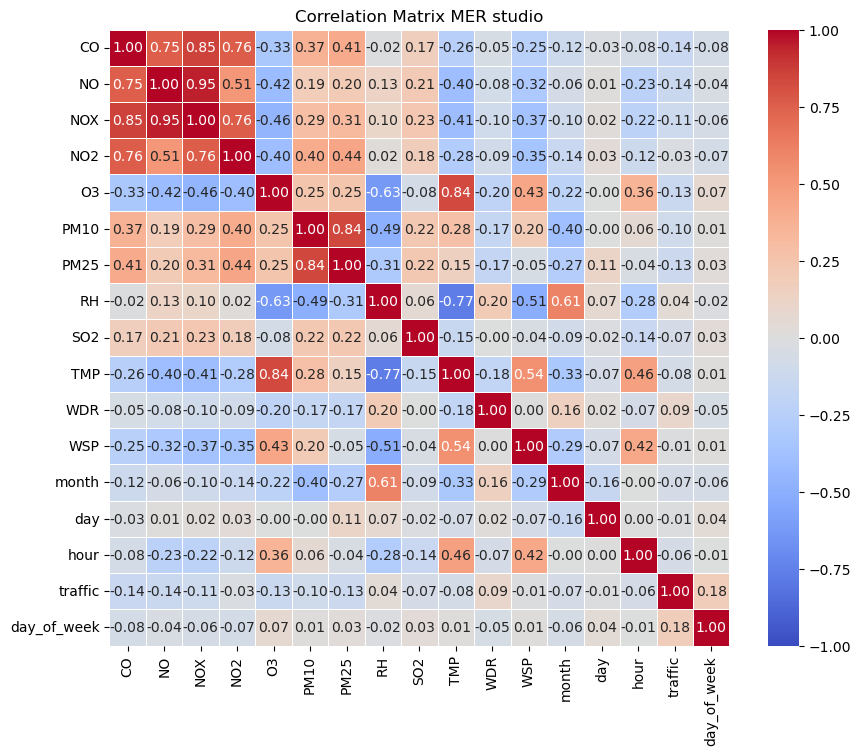

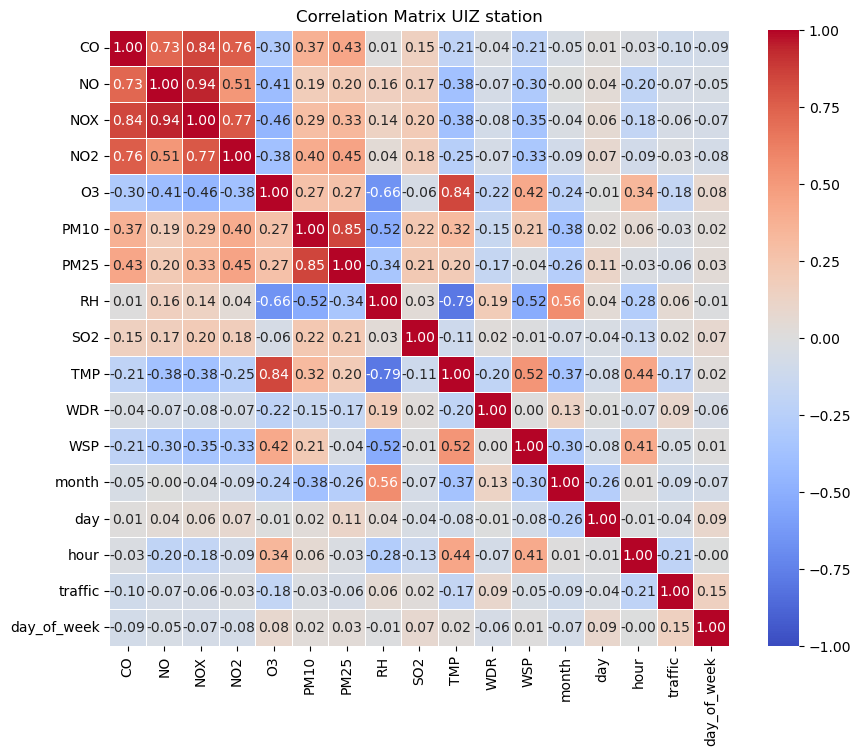

In [2]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix MER studio")
plt.show()

#X = df.drop(columns=['date', 'year', 'month', 'day', 'minute', 'traffic'])
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix UIZ station")
plt.show()


In [3]:
def correlation_plots(df, df2, station1, station2):
	for var in ["O3", "PM10", "PM25", "NO2", "SO2", "CO", "NO", "NOX", "traffic"]:
		target_variable = var
		# Calcular correlaciones con la variable objetivo
		corr1 = df.corr()[target_variable].drop(target_variable).sort_values(ascending=False)
		corr2 = df2.corr()[target_variable].drop(target_variable).sort_values(ascending=False)
		# Plot
		fig, axes = plt.subplots(1, 2, figsize=(18, 4))

		# First subplot
		sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
		axes[0].set_ylim(-1, 1)
		axes[0].set_ylabel("Correlation coeficient")
		axes[0].set_xlabel("Variables")
		axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
		axes[0].grid(axis="y", linestyle="--", alpha=0.7)
		axes[0].set_title(f"Correlation of variables with'{target_variable}' in {station1} station", fontsize=16, fontweight="bold")
		#"""
		# Second subplot
		sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
		axes[1].set_ylim(-1, 1)
		axes[1].axhline(0, color='black', linewidth=1)
		axes[1].set_ylabel("Correlation coeficient")
		axes[1].set_xlabel("Variables")
		axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
		axes[1].grid(axis="y", linestyle="--", alpha=0.7)
		axes[1].set_title(f"Correlation of variables with'{target_variable}' in {station2} station", fontsize=16, fontweight="bold")
		# Show plot
		plt.tight_layout()
		plt.show()
		#"""

In [4]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])

#correlation_plots(df, df2, "MER", "UIZ")

In [15]:
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
#df  = pd.read_csv(file_path)

df  = pd.read_csv('C:/Users/valer/Documents/CIC/doctorado/Proyecto_Innovacion/main/air-poll-predict-dev/API/InfoPostgres/Datos/air_traffic_MER_norm.csv')
df = df.dropna().reset_index(drop=True)
df["datetime"] = df["date"].astype(str) + " " + df["hour"].astype(str) + ":" +df["minute"].astype(str)+"0:00"

In [9]:
df

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,year,month,day,hour,minute,traffic,datetime
0,2024-02-23,0.153086,0.006024,0.075529,0.214953,0.791367,0.312925,0.309524,0.078652,0.031250,0.652174,0.813889,0.318182,2024,2,23,14,0,0.90,2024-02-23 14:00:00
1,2024-02-23,0.187654,0.006024,0.111782,0.317757,0.899281,0.353741,0.416667,0.044944,0.031250,0.739130,0.766667,0.272727,2024,2,23,15,0,0.78,2024-02-23 15:00:00
2,2024-02-23,0.138272,0.003012,0.075529,0.224299,0.956835,0.380952,0.464286,0.022472,0.031250,0.782609,0.108333,0.318182,2024,2,23,16,0,0.98,2024-02-23 16:00:00
3,2024-02-23,0.101235,0.000000,0.045317,0.140187,0.913669,0.319728,0.416667,0.000000,0.015625,0.782609,0.127778,0.303030,2024,2,23,17,0,0.75,2024-02-23 17:00:00
4,2024-02-26,0.081481,0.006024,0.030211,0.074766,0.395683,0.170068,0.202381,0.067416,0.000000,0.695652,0.155556,0.348485,2024,2,26,14,0,0.77,2024-02-26 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,2024-12-20,0.177778,0.042169,0.108761,0.205607,0.079137,0.333333,0.226190,0.505618,0.015625,0.304348,0.988889,0.575758,2024,12,20,19,0,0.98,2024-12-20 19:00:00
3518,2024-12-20,0.148148,0.024096,0.078550,0.168224,0.071942,0.401361,0.154762,0.573034,0.015625,0.217391,0.011111,0.575758,2024,12,20,20,0,0.95,2024-12-20 20:00:00
3519,2024-12-20,0.187654,0.045181,0.111782,0.196262,0.035971,0.292517,0.119048,0.617978,0.015625,0.173913,0.922222,0.378788,2024,12,20,21,0,0.98,2024-12-20 21:00:00
3520,2024-12-20,0.162963,0.048193,0.120846,0.224299,0.021583,0.170068,0.071429,0.640449,0.031250,0.173913,0.822222,0.560606,2024,12,20,22,0,1.00,2024-12-20 22:00:00


In [16]:
def graficar_predicciones(new_hours, predicciones, variable):
  """

  Args:
    new_hours:
    target:
    predicciones:
  """
  fechas = new_hours
  # Convertir las fechas a objetos datetime
  fechas_datetime = [datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S') for fecha in fechas]

  # Crear el gráfico
  plt.figure(figsize=(10, 6))

  # Graficar el target y las predicciones en el eje Y
  plt.plot(fechas_datetime, predicciones, label='Predicciones', marker='o')

  # Configurar formato de fecha en el eje X
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

  # Rotar las fechas para mayor legibilidad
  plt.gcf().autofmt_xdate()

  # Configurar etiquetas y título
  plt.xlabel('Datetime')
  plt.ylabel(r'O$_3$ Value')
  title1 = 'Comparison over time of the predicted values ​​vs their actual value (' + variable +')'
  plt.title(title1)

  # Mostrar la leyenda
  plt.legend()
  plt.grid(True)
  # Mostrar el gráfico
  plt.show()

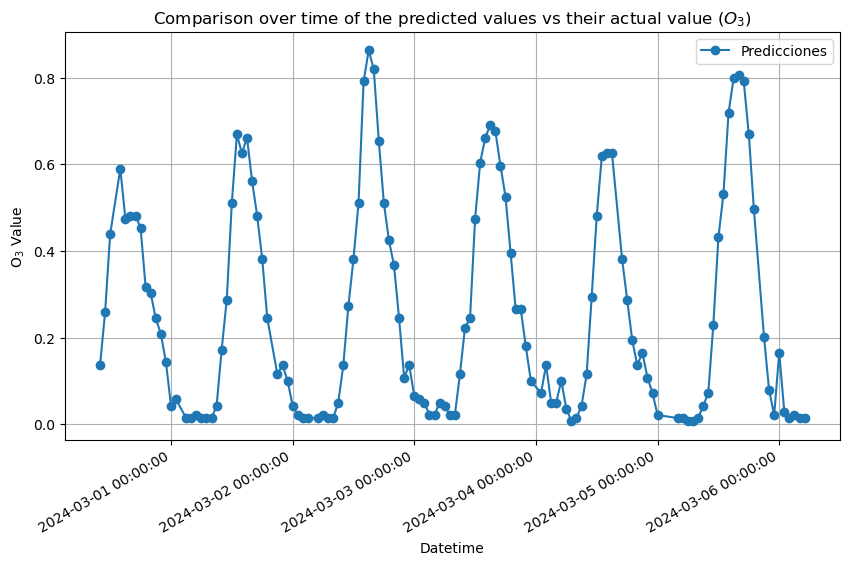

In [20]:
graficar_predicciones(df["datetime"][50:180], df.O3[50:180], r'$O_3$')

In [6]:
def plot_values(df_bymonth, df_byhour, varXmonth, varXhour):
	fig, axes = plt.subplots(2, 3, figsize=(16, 5))
	axes[0, 0].scatter(df_bymonth[varXmonth],df_bymonth.O3)
	axes[0, 0].set_ylabel(r'O$_3$')
	axes[0, 0].set_xlabel("Month of the year")
	axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 1].scatter(df_bymonth[varXmonth],df_bymonth.TMP)
	axes[0, 1].set_ylabel("Temperature")
	axes[0, 1].set_xlabel("Month of the year")
	axes[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.O3, label=r'O$_3$', color='r')  
	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.TMP, label="Temperature", color='b')
	axes[0, 2].legend()  # Add legend
	axes[0, 2].set_ylabel("Values normalized")
	axes[0, 2].set_xlabel("Month of the year")

	axes[1, 0].scatter(df_byhour[varXhour],df_byhour.O3)
	axes[1, 0].set_ylabel(r'O$_3$')
	axes[1, 0].set_xlabel("Hour of the day")
	axes[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 1].scatter(df_byhour[varXhour],df_byhour.TMP)
	axes[1, 1].set_ylabel("Temperature")
	axes[1, 1].set_xlabel("Hour of the day")
	axes[1, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 2].plot(df_byhour[varXhour],df_byhour.O3, label=r'O$_3$', color='r') 
	axes[1, 2].plot(df_byhour[varXhour],df_byhour.TMP, label="Temperature", color='b') 
	axes[1, 2].legend()  # Add legend
	axes[1, 2].set_ylabel("Values normalized")
	axes[1, 2].set_xlabel("Hour of the day")
	axes[1, 2].grid(axis="y", linestyle="--", alpha=0.7)

	# Titles for each subplot (optional)
	axes[0, 0].set_title('Ozone vs month of the year 2024')
	axes[0, 1].set_title('Temperature vs month of the year 2024')
	axes[0, 2].set_title('Tmp&Ozone vs month of the year')
	axes[1, 0].set_title('Ozone vs hour of the day')
	axes[1, 1].set_title('Temperature vs hour of the day')

	plt.tight_layout()
	plt.show()

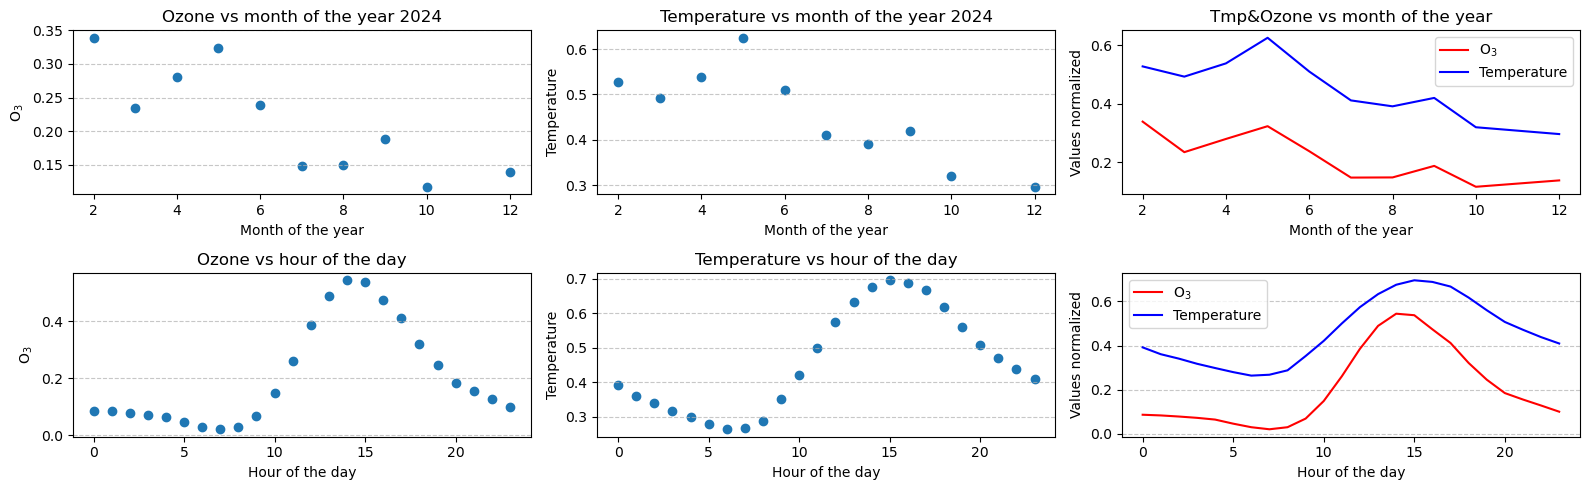

In [29]:
df_bymonth_original = df.groupby('month').agg({
        'O3': 'mean',  
        'TMP': 'mean',  
    }).reset_index()
df_byhour_original = df.groupby('hour').agg({
        'O3': 'mean',  
        'TMP': 'mean', 
    }).reset_index()
plot_values(df_bymonth_original,df_byhour_original, "month", "hour")

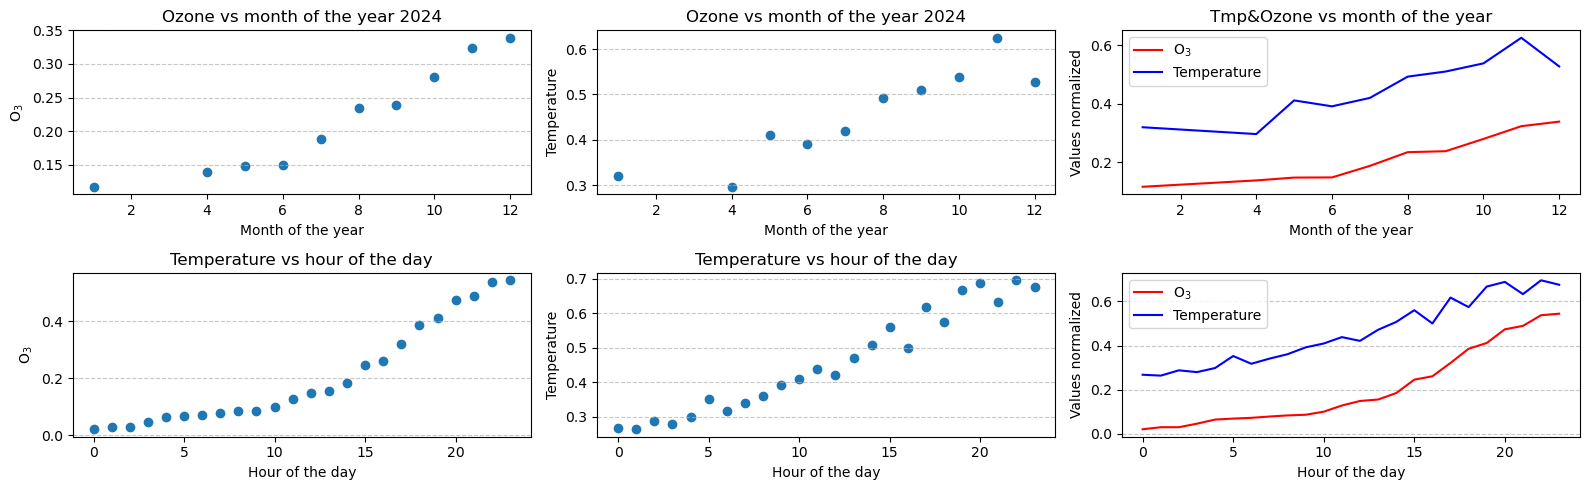

In [15]:
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df_bymonth = df_bymonth_original.sort_values(by='O3', ascending=True)
df_bymonth["month_idx"] = df_bymonth["month"].map(month_idx)

hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df_byhour = df_byhour_original.sort_values(by='O3', ascending=True)
df_byhour["hour_idx"] = df_byhour["hour"].map(hour_idx)

plot_values(df_bymonth,df_byhour, "month_idx", "hour_idx")

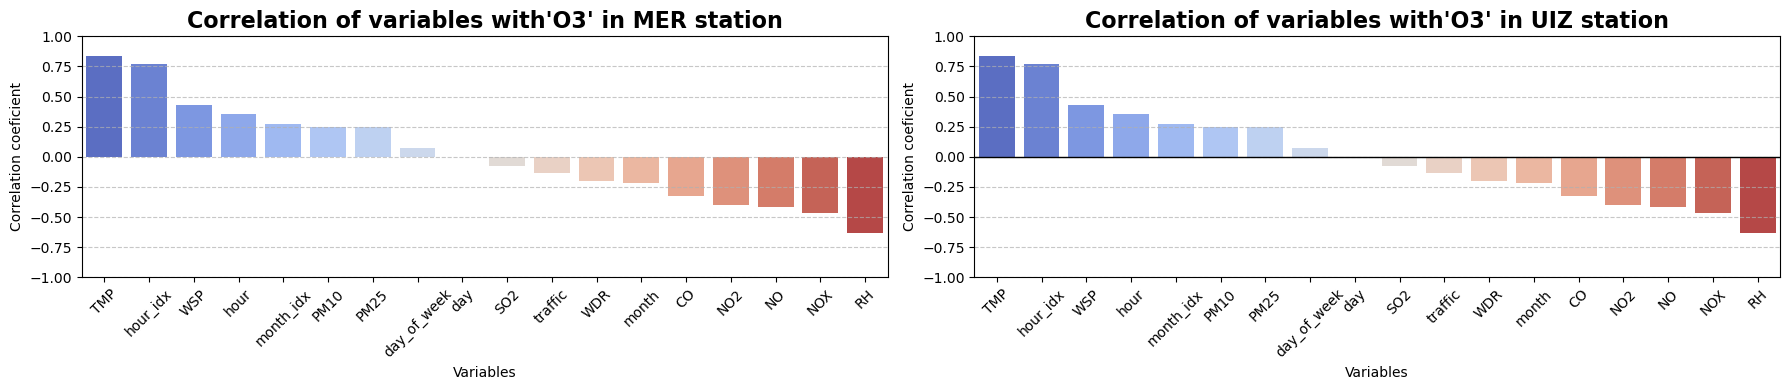

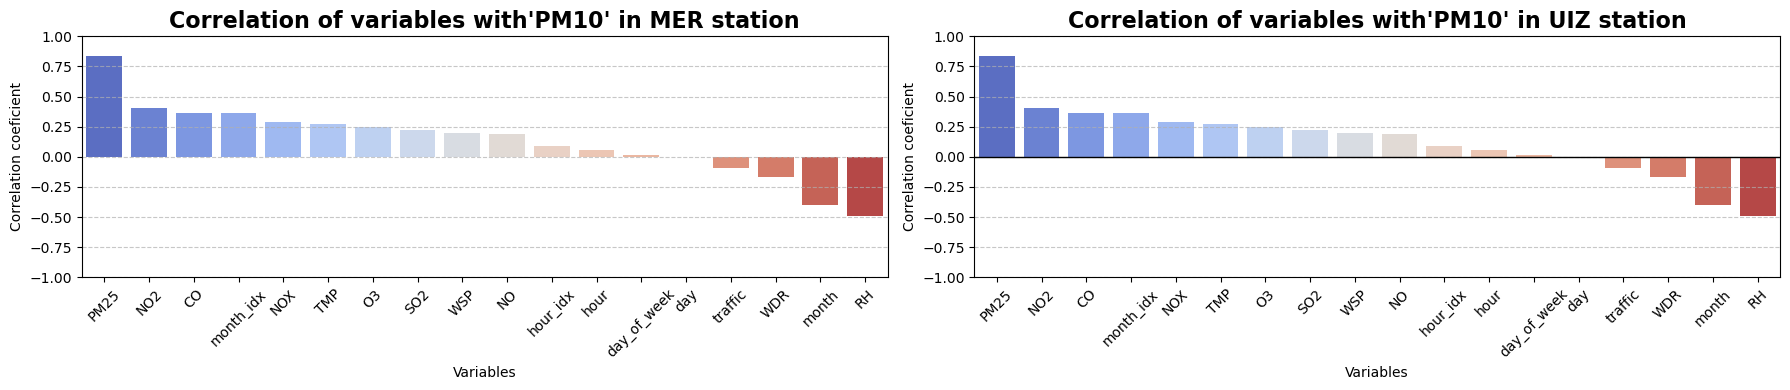

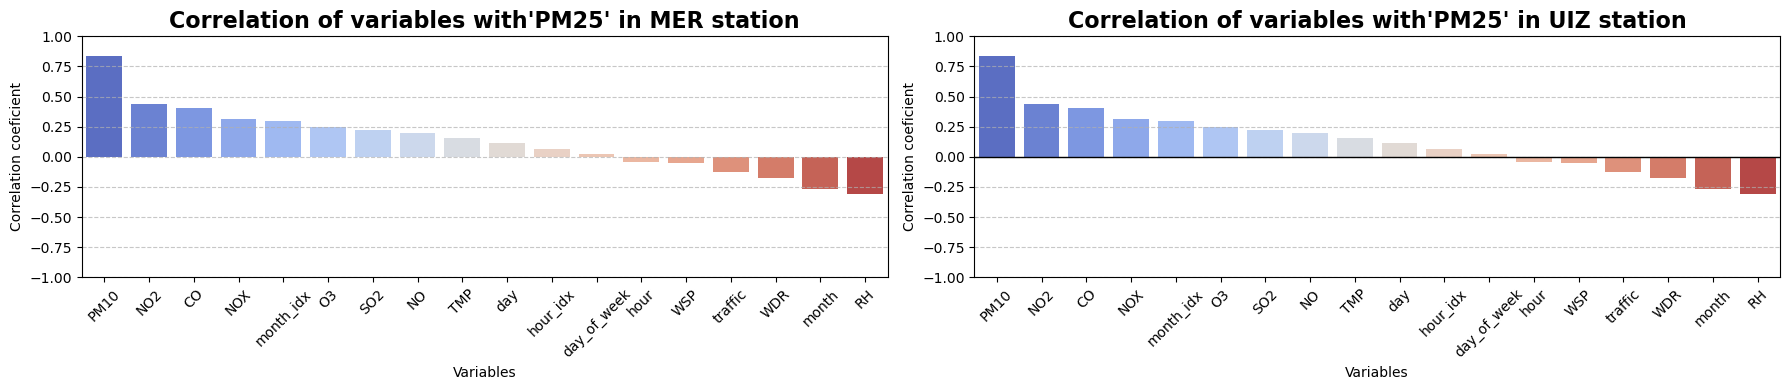

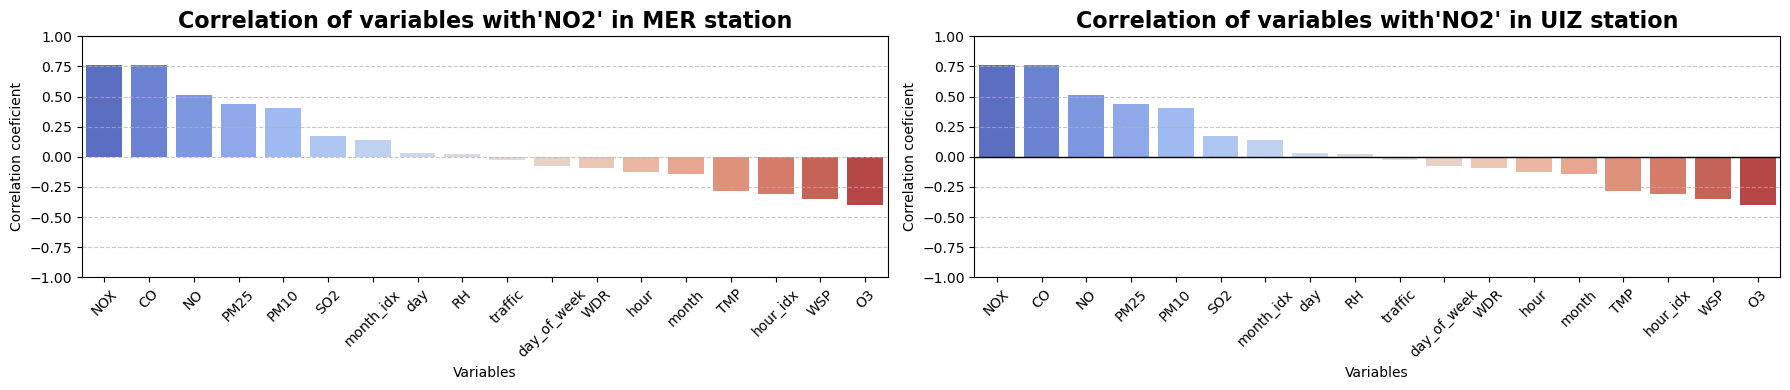

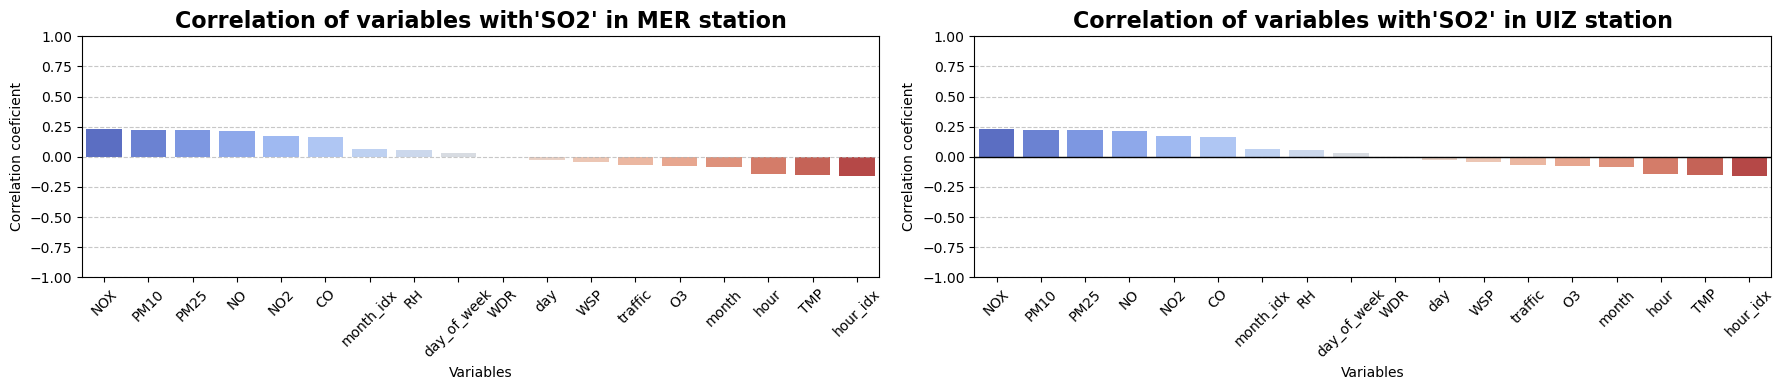

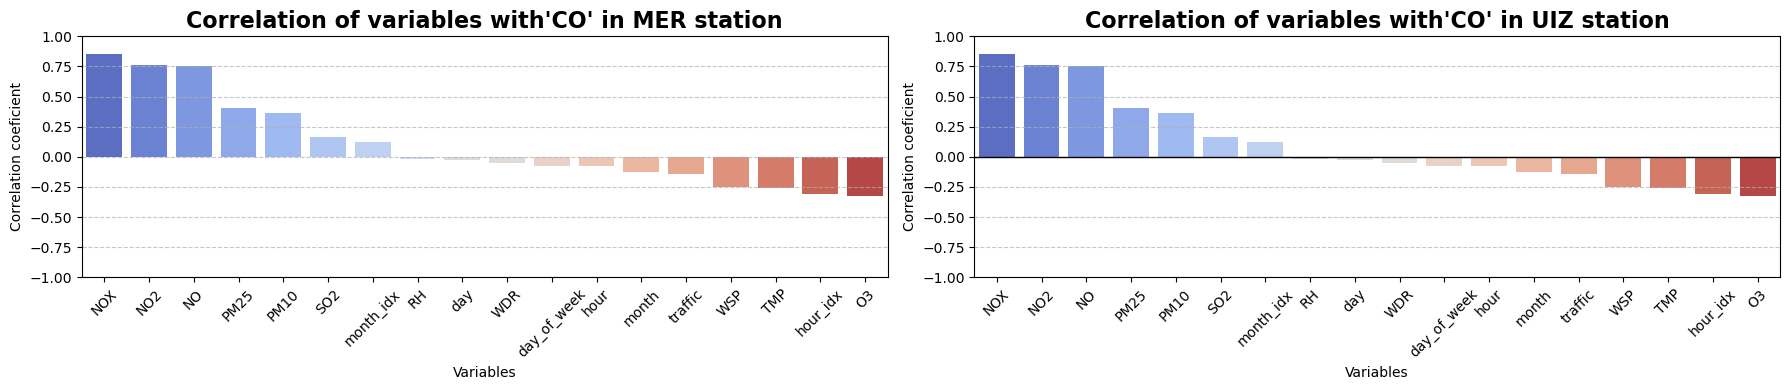

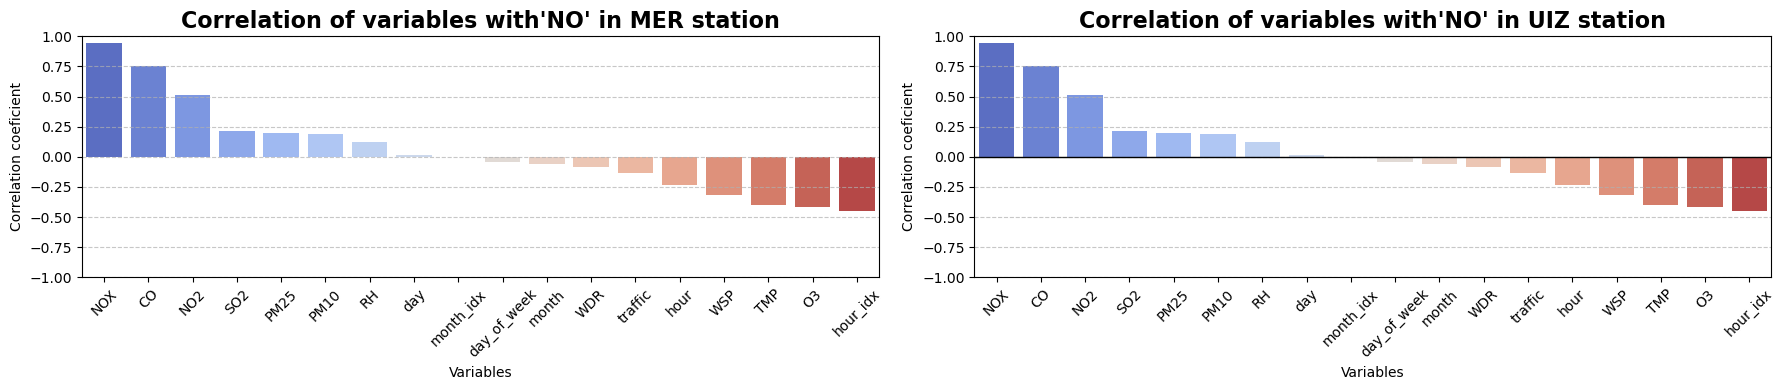

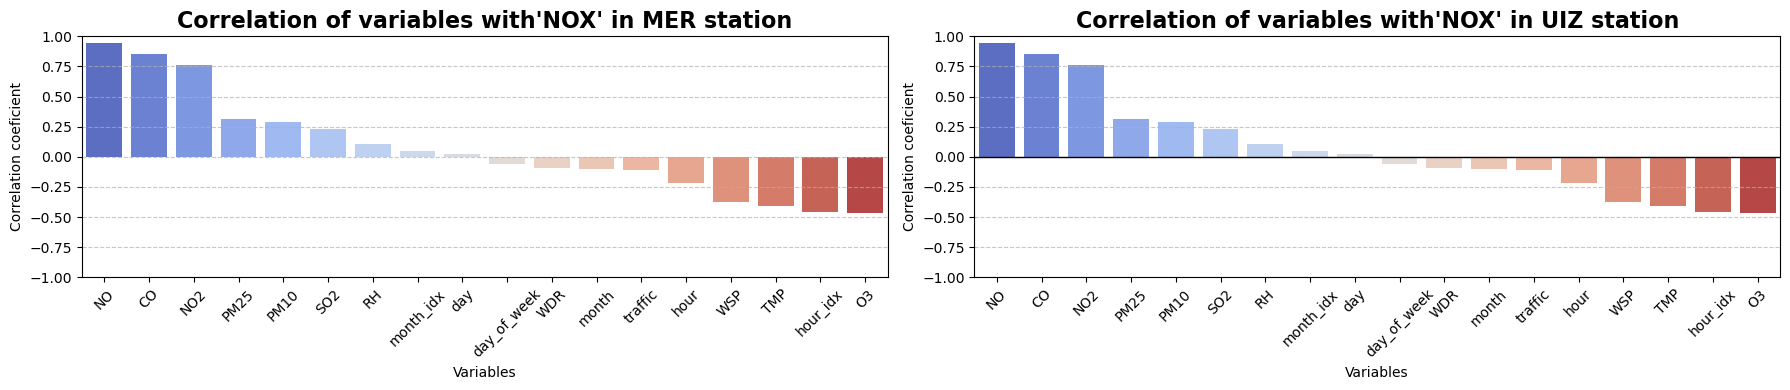

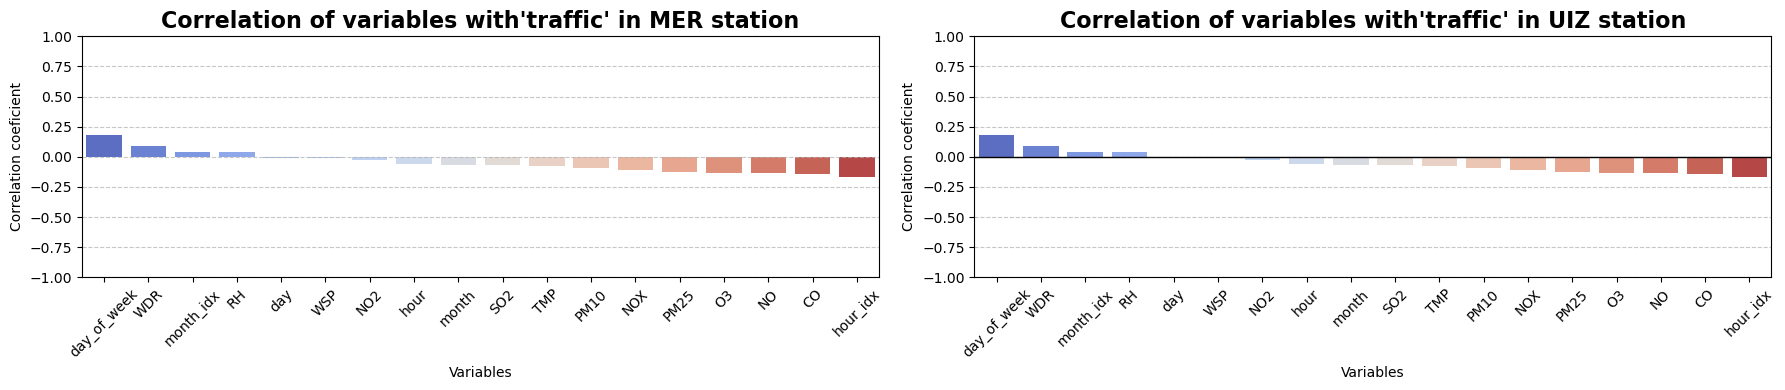

In [5]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df["month_idx"] = df["month"].map(month_idx)
hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df["hour_idx"] = df["hour"].map(hour_idx)

file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df2["month_idx"] = df2["month"].map(month_idx)
hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df2["hour_idx"] = df2["hour"].map(hour_idx)

correlation_plots(df, df, "MER", "UIZ")

Text(0.5, 1.0, 'Correlation Matrix UIZ station')

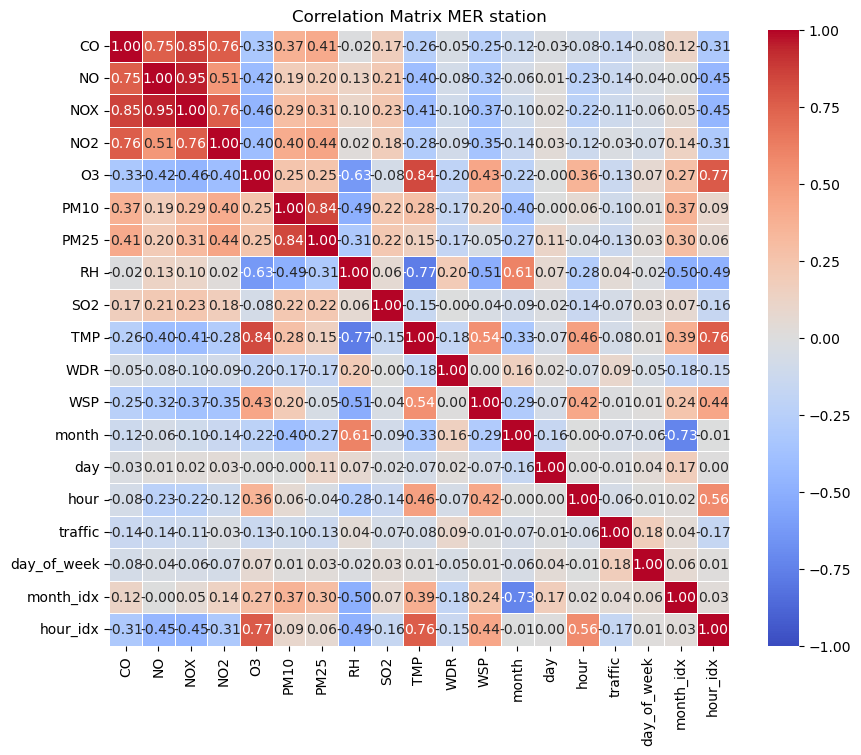

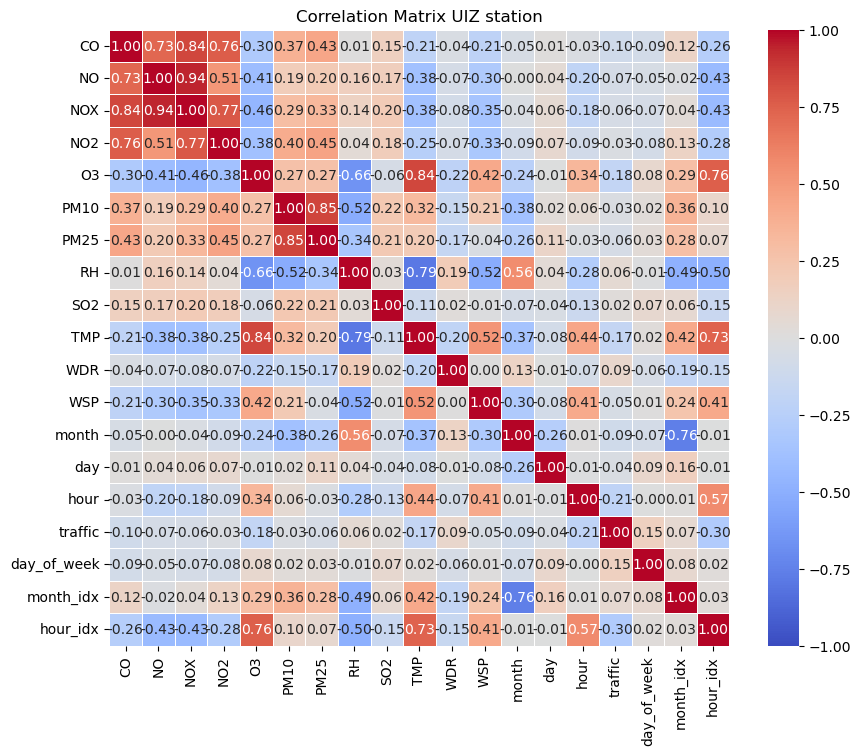

In [40]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix MER station")

corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix UIZ station")

Plot of the temperature vs ozone

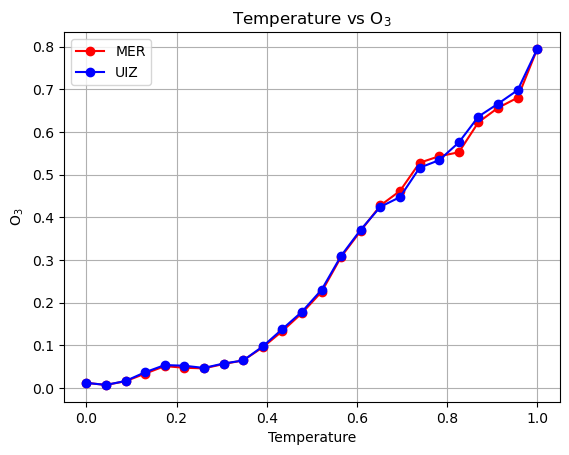

In [6]:
df_tmp = df.groupby('TMP').agg({'O3': 'mean'}).reset_index()
df_tmp2 = df2.groupby('TMP').agg({'O3': 'mean'}).reset_index()
plt.plot(df_tmp.TMP,df_tmp.O3, marker='o', label='MER', color='r')
plt.plot(df_tmp2.TMP,df_tmp2.O3, marker='o', label='UIZ', color='b')
plt.xlabel('Temperature')
plt.ylabel(r'O$_3$')
title1 = r'Temperature vs O$_3$'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()


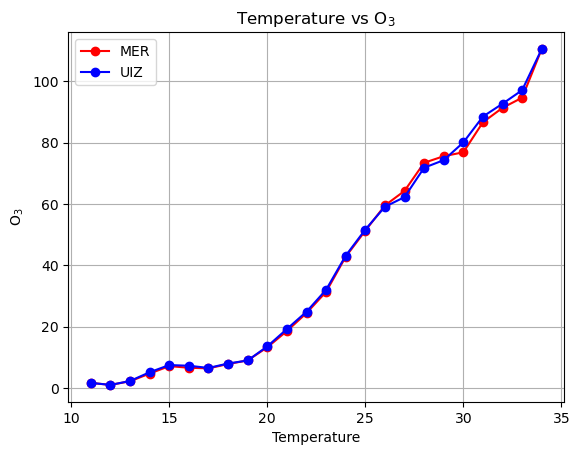

In [7]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)

file_path = os.path.join(dir,"air_traffic_UIZ_prom.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df_tmp = df.groupby('TMP').agg({'O3': 'mean'}).reset_index()
df_tmp2 = df2.groupby('TMP').agg({'O3': 'mean'}).reset_index()
plt.plot(df_tmp.TMP,df_tmp.O3, marker='o', label='MER', color='r')
plt.plot(df_tmp2.TMP,df_tmp2.O3, marker='o', label='UIZ', color='b')
plt.xlabel('Temperature')
plt.ylabel(r'O$_3$')
title1 = r'Temperature vs O$_3$'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()

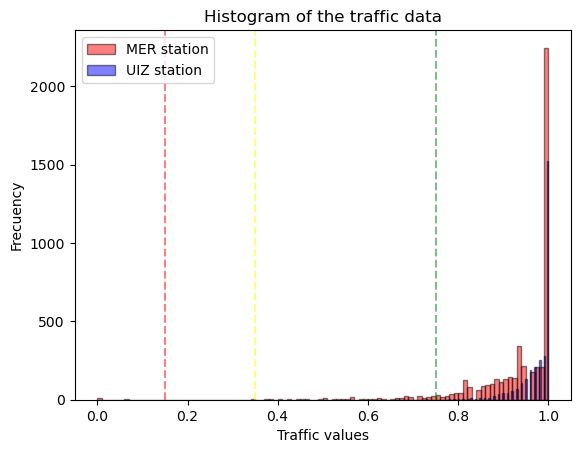

In [67]:
plt.hist(df.traffic, bins=100, color='red', edgecolor='black', alpha=0.5)
plt.hist(df2.traffic, bins=100, color='blue', edgecolor='black', alpha=0.5)
plt.title('Histogram of the traffic data')
plt.xlabel('Traffic values')
plt.ylabel('Frecuency')
plt.legend(["MER station", "UIZ station"], loc="upper left")
plt.axvline(x = 0.15, color = 'red', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.35, color = 'yellow', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.75, color = 'green', linestyle = '--', alpha = 0.5)
#plt.show()

In [8]:
bins = [0, 0.15, 0.35, 0.75, 1.2]  # Definir los intervalos
labels = ['0-0.15', '0.15-0.35', '0.35-0.75', '0.75-1']  # Etiquetas para los intervalos
df['rango'] = pd.cut(df['traffic'], bins=bins, labels=labels, right=False)
conteo_rangos = df['rango'].value_counts()
print(conteo_rangos)


rango
0.75-1       3312
0.35-0.75     193
0-0.15         11
0.15-0.35       6
Name: count, dtype: int64


In [7]:
def plot_hist(df_plot,i,j, varX, axes, trf):
	axes[i, j].hist(df_plot[varX], bins=60, color='red', edgecolor='black', alpha=0.5)
	axes[i, j].set_ylabel(r'Frequency')
	axes[i, j].set_xlabel(f"{varX}")
	axes[i, j].grid(axis="y", linestyle="--", alpha=0.7)
	axes[i,j].set_title(f'Histogram of {varX}, traffic range {trf}')
	plt.tight_layout()


C:\Users\valer\AppData\Local\Temp\ipykernel_4276\2142172592.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


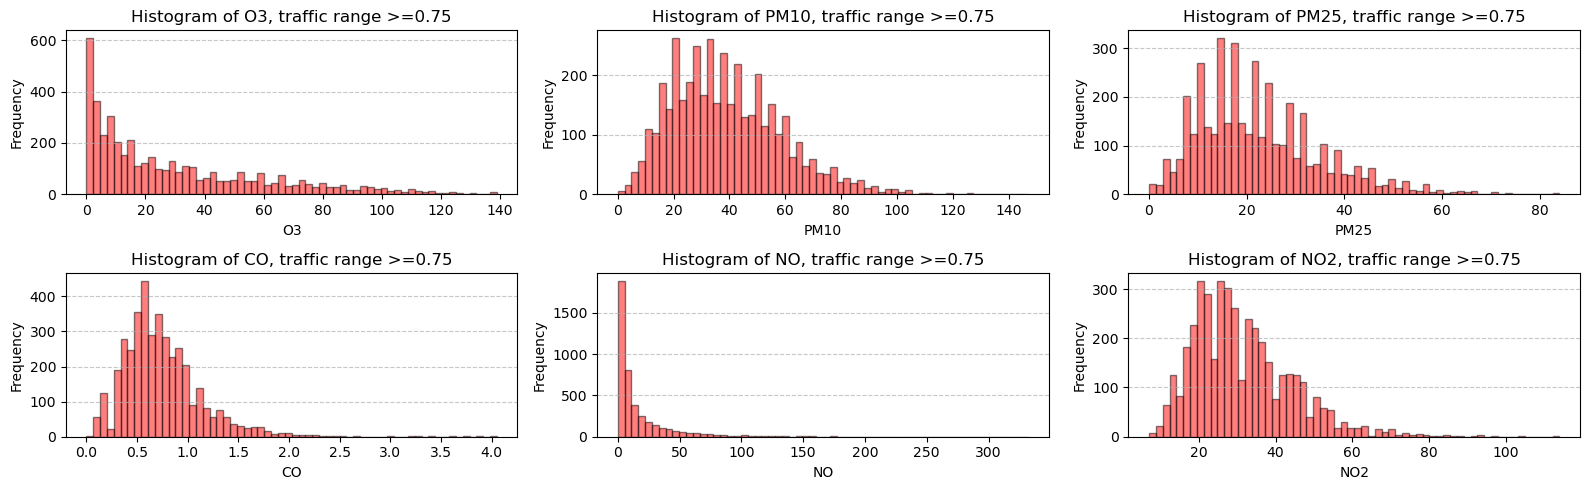

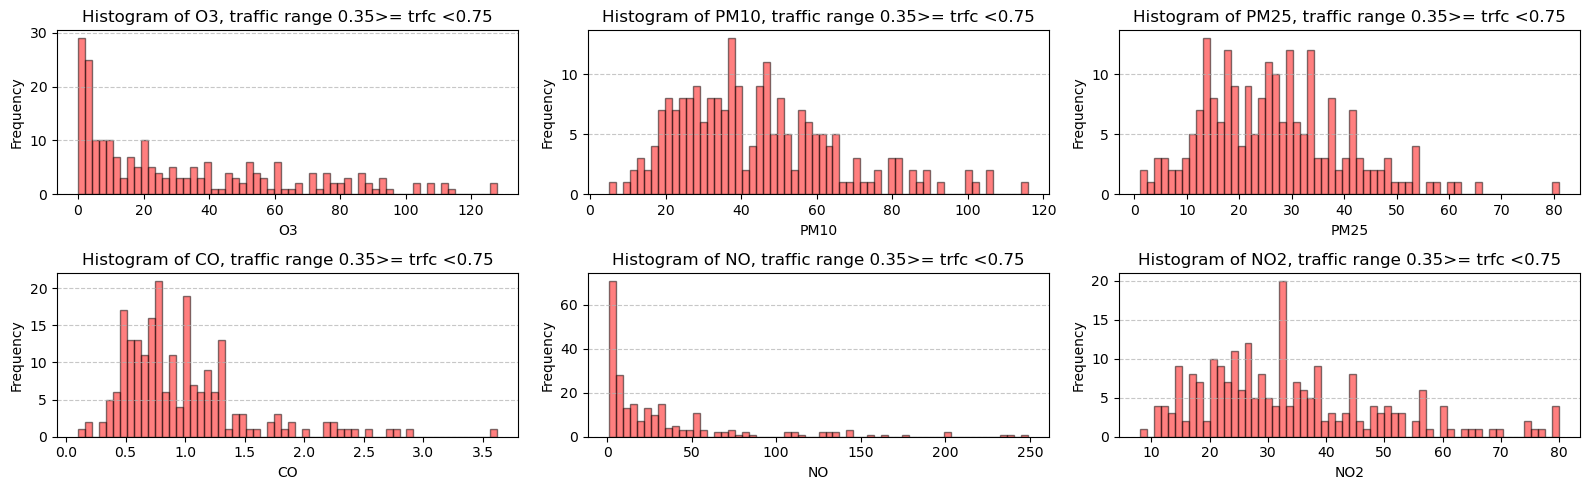

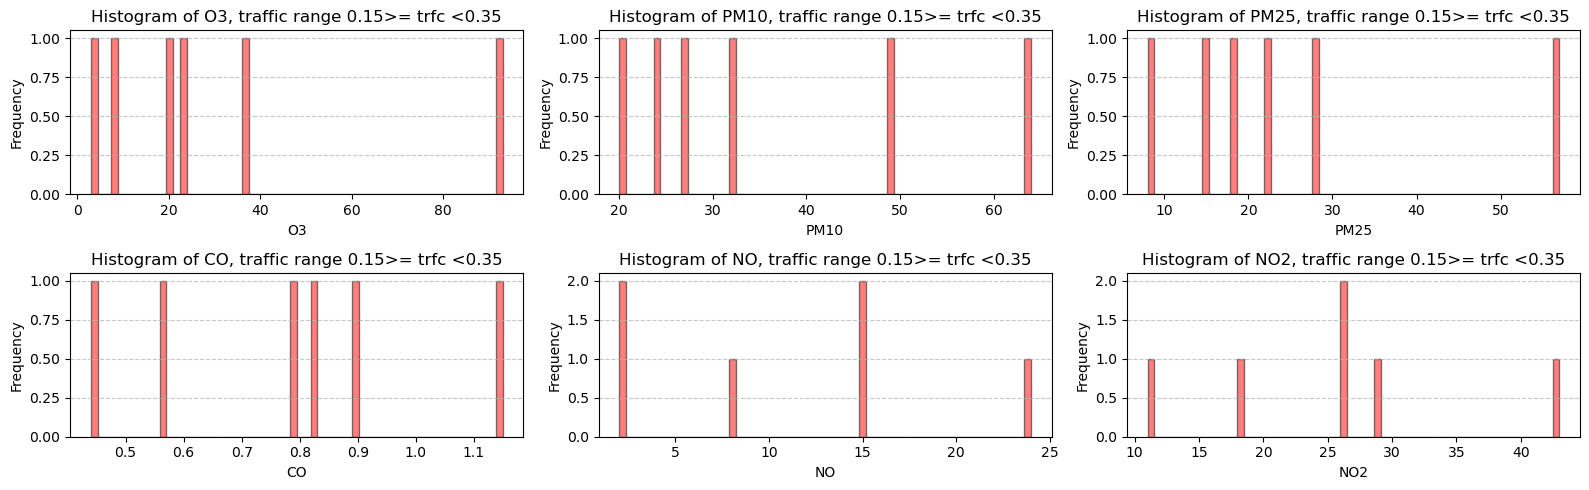

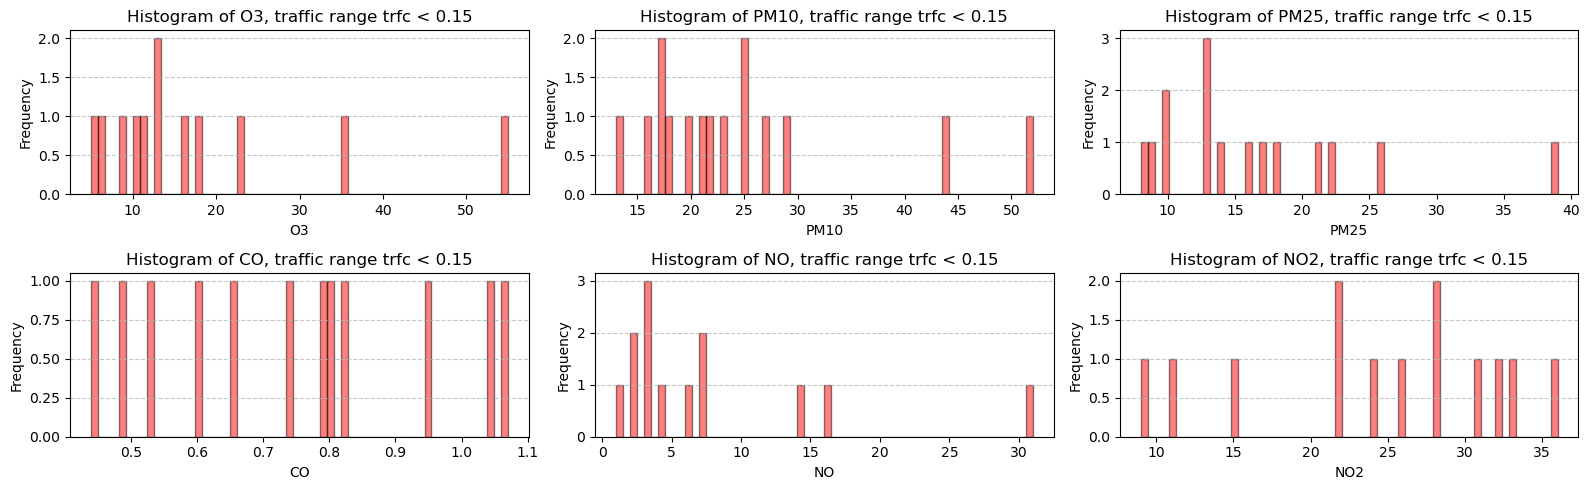

In [112]:
df75 = df[df.traffic >= 0.75]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist(df75, i, j, pollutants[k], axes, ">=0.75")
		k = k+1
plt.show()

df75 = df[(df.traffic >= 0.35) & (df.traffic <0.75)]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist(df75, i, j, pollutants[k], axes, "0.35>= trfc <0.75")
		k = k+1
plt.show()

df75 = df[(df.traffic >= 0.15) & (df.traffic <0.35)]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist(df75, i, j, pollutants[k], axes, "0.15>= trfc <0.35")
		k = k+1
plt.show()


df75 = df[df.traffic < 0.15]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist(df75, i, j, pollutants[k], axes, "trfc < 0.15")
		k = k+1
plt.show()

In [9]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos\air_traffic_MER_prom.csv"
df = pd.read_csv(dir)

In [12]:
df.keys()

Index(['date', 'CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2',
       'TMP', 'WDR', 'WSP', 'year', 'month', 'day', 'hour', 'minute',
       'traffic'],
      dtype='object')

In [ ]:
target_idx = {'CO':0, 'NO':1, 'NOX':2, 'NO2':3, 'O3':4, 'PM10':5, 'PM25':6, 'RH':7, 'SO2':8, 'TMP':9, 'WDR':10, 'WSP':11}

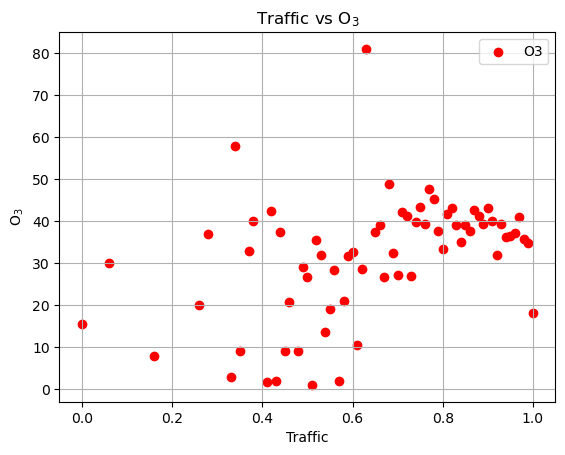

In [79]:
df_trf = df.groupby('traffic').agg({'O3': 'mean', 'TMP': 'mean',  }).reset_index()
plt.scatter(df_trf.traffic,df_trf.O3, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Traffic')
plt.ylabel(r'O$_3$')
title1 = r'Traffic vs O$_3$'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()

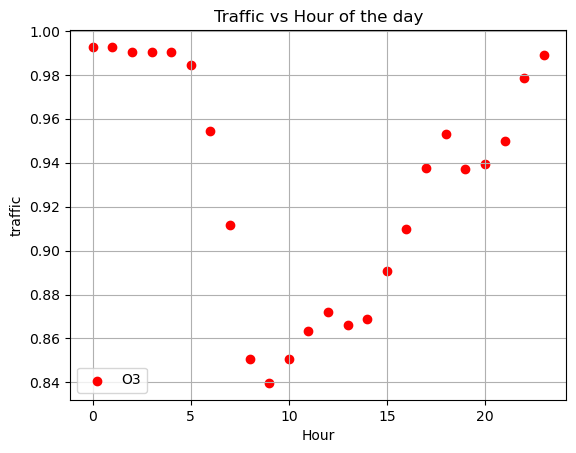

In [80]:
df_trf = df.groupby('hour').agg({'traffic': 'mean', 'O3': 'mean',  }).reset_index()
plt.scatter(df_trf.hour,df_trf.traffic, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Hour')
plt.ylabel(r'traffic')
title1 = r'Traffic vs Hour of the day'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()

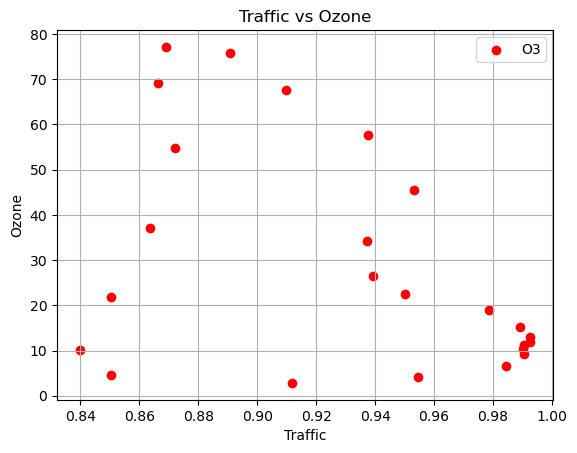

In [65]:
df_trf = df.groupby('hour').agg({'traffic': 'mean', 'O3': 'mean' }).reset_index()
plt.scatter(df_trf.traffic,df_trf.O3, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Traffic')
plt.ylabel(r'Ozone')
title1 = r'Traffic vs Ozone'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()